In [1]:
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
alldata = sm.datasets.macrodata.load_pandas().data
mdata = alldata

In [3]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)

In [ ]:
alldata.to_html('us_economy.html')

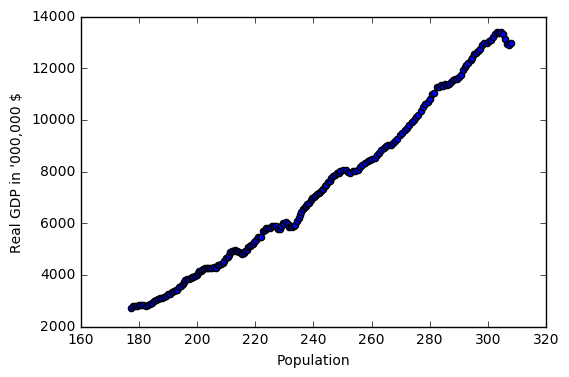

In [10]:
plt.scatter(alldata['pop'], alldata['realgdp']) # try other combinations to get a sense for how the variables are related
plt.xlabel('Population')
plt.ylabel('Real GDP in \'000,000 $')
plt.show()

In [11]:
import statsmodels.formula.api as smf
res = smf.ols('tbilrate ~ realgdp + infl', data=alldata).fit()
res.summary() # what a simple linear regression could tell you

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tbilrate   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     69.64
Date:                Sat, 21 Jan 2017   Prob (F-statistic):           1.11e-23
Time:                        08:32:31   Log-Likelihood:                -443.13
No. Observations:                 203   AIC:                             892.3
Df Residuals:                     200   BIC:                             902.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.3246      0.453      9.546      0.000         3.431     5.218
realgdp       -0.0001   4.82e-05     -2.941      0.004        -0.000 -4.67e-05
infl           0.5078      0.048     10.653      0.000         0.414     0.602
==============================================================================
Omnibus:                       32.159   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.732
Skew:                           0.935   Prob(JB):                     1.17e-10
Kurtosis:                       4.383   Cond. No.                     2.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

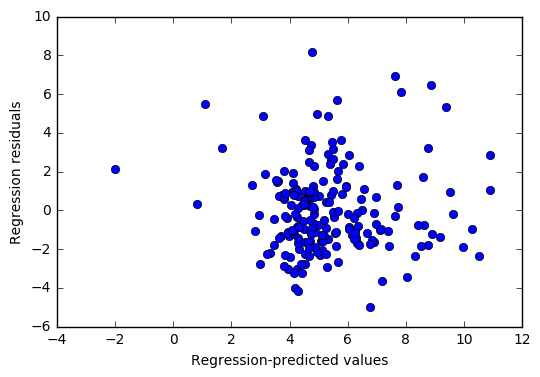

In [12]:
plt.plot(res.fittedvalues, res.resid, 'o') # what should the plot of the regression errors vs the fitted values look like? 
plt.xlabel('Regression-predicted values')
plt.ylabel('Regression residuals')
plt.show()

In [13]:
mdata = mdata[['realgdp','unemp','realinv']]  # can rerun the analysis using a different subset of the data
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

In [14]:
model = VAR(data)  # fitting an autoregression model

In [15]:
model.select_order(8)

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -23.30       -23.25    7.628e-11       -23.28
1       -23.86      -23.66*    4.338e-11      -23.78*
2      -23.90*       -23.54   4.180e-11*       -23.76
3       -23.86       -23.35    4.344e-11       -23.66
4       -23.84       -23.18    4.439e-11       -23.57
5       -23.79       -22.98    4.647e-11       -23.47
6       -23.78       -22.82    4.735e-11       -23.39
7       -23.75       -22.64    4.847e-11       -23.30
8       -23.81       -22.54    4.600e-11       -23.30
* Minimum



{'aic': 2, 'bic': 1, 'fpe': 2, 'hqic': 1}

In [16]:
results = model.fit(2)   # we chose a lag order of 2 for the final model. Why?

In [17]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 21, Jan, 2017
Time:                     08:34:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -23.4052
Nobs:                     200.000    HQIC:                  -23.6114
Log likelihood:           1544.79    FPE:                4.84039e-11
AIC:                     -23.7515    Det(Omega_mle):     4.36575e-11
--------------------------------------------------------------------
Results for equation realgdp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.004090         0.001354            3.021           0.003
L1.realgdp         0.259654         0.120505            2.155           0.032
L1.unemp          -0.066741         0.017719           -3.767         

In [21]:
results.test_causality('realinv', ['realgdp']) # Real GDP affects future real investment

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         4.656808         3.011286            0.010  (2, 579L)
H_0: ['realgdp'] do not Granger-cause realinv
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 3.0112857238108681,
 'df': (2, 579L),
 'pvalue': 0.0098552481436107956,
 'signif': 0.05,
 'statistic': 4.6568082898981391}

In [22]:
results.test_causality('realgdp', ['realinv']) # Previous real investment does not affect future real GDP

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         2.794544         3.011286            0.062  (2, 579L)
H_0: ['realinv'] do not Granger-cause realgdp
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 3.0112857238108681,
 'df': (2, 579L),
 'pvalue': 0.061967671922936257,
 'signif': 0.05,
 'statistic': 2.7945441455830955}

In [23]:
# What does this say about the relationship between investment and GDP? 

In [24]:
# Can rerun the analysis for other pairs of variables to get more insights into the dataset